##Italy
###Proyecto Final. Alma Lagunas. 

In [243]:
using PyPlot #Cargamos la Libreria;
using SeisIO #cargamos la libreria;
using DSP #CARGAMOS LIBRERIA
using Seismic

In [244]:
st=readmseed("BERNI_FUORN_Thurweiser_SwissSeismologicalService.mseed");

In [245]:
st[5].id;


In [246]:
HHE=st[1];

In [247]:
HHN=st[2];

In [248]:
HHZ=st[3];


In [249]:
HHN=st[4];


In [250]:
HHE=st[5];


In [251]:
HHZ=st[6];

In [252]:
tsHHE = collect(0:length(HHE.x)-1)*(1/HHE.fs);


In [253]:
tsHHN = collect(0:length(HHN.x)-1)*(1/HHN.fs);

In [254]:
tsHHZ = collect(0:length(HHZ.x)-1)*(1/HHZ.fs);

Remover la tendencia lineal 

In [255]:
# Remove Lineal-trend
function rtrend(t,x)
    x0, x1 = linreg(t,x)
    x = x - (x0 + x1*t)
    return x
end 

rtrend (generic function with 1 method)

Eliminar el promedio y la tendencia


In [269]:
conmps = 1/6.276150e+08
data1 = HHE.x;
data1 = data1 * conmps
data1 = data1 - mean(data1)
data1 = rtrend(tsHHE,data1)
dat1 = data1[440000:470000]
tiempo1= tsHHE[440000:470000];

In [270]:
conmps = 1/6.276150e+08
data2 = HHN.x;
data2 = data2 *conmps
data2 = data2 - mean(data2)
data2 = rtrend(tsHHN,data2);
data2 = HHN.x;
dat2 = data2[440000:470000];
tiempo2= tsHHN[440000:470000];

In [258]:
conmps = 1/6.276150e+08
data3 = HHZ.x;
data3 = data3 * conmps
data3 = data3 - mean(data3)
data3 = rtrend(tsHHZ,data3);
dat3 = data3[440000:470000];
tiempo3= tsHHZ[440000:470000];

In [259]:
size(data3);

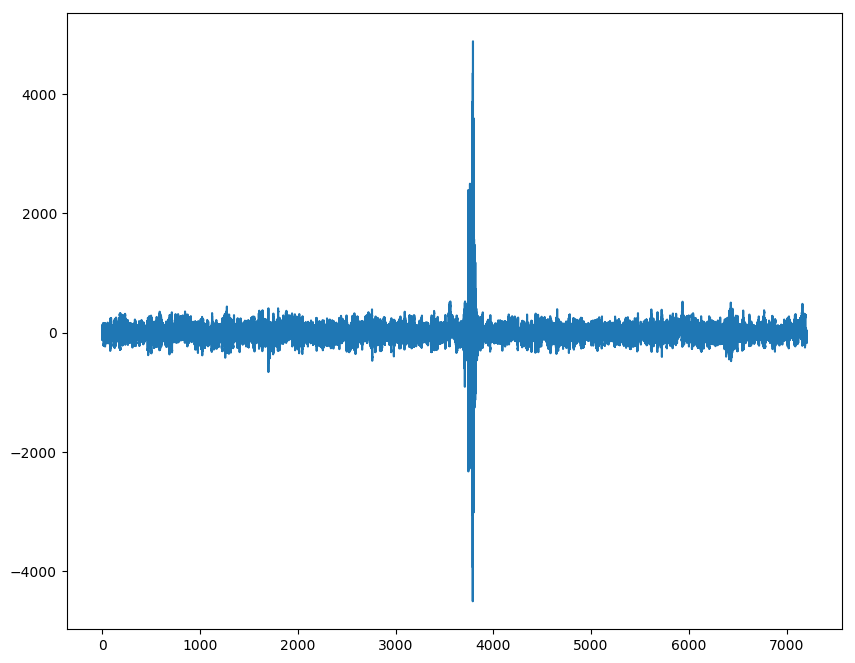

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1352c9110>

In [260]:
fig = figure(figsize=(10,8))
plot(tsHHN,data2)

Se generó una ventana para eliminar el riudo 




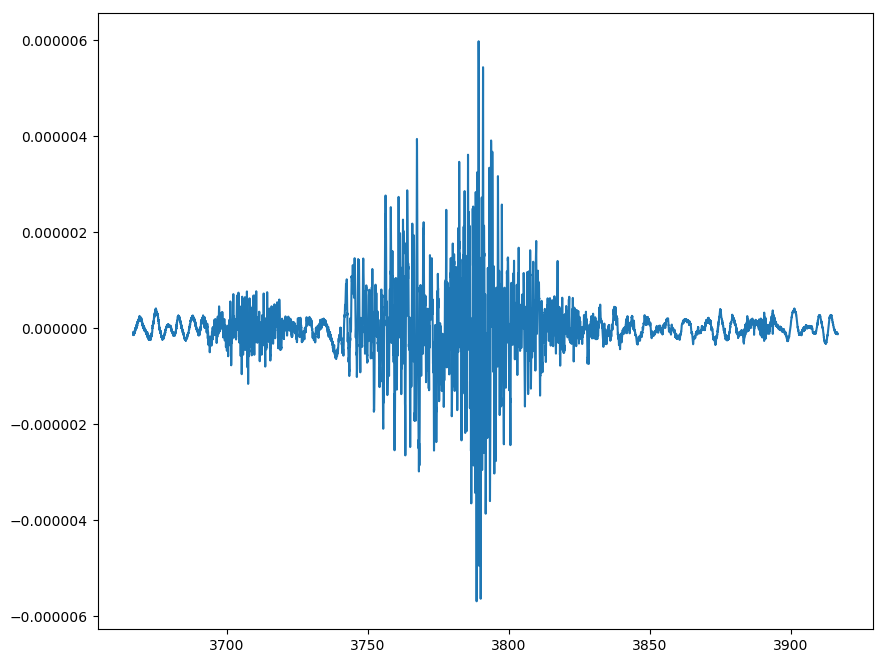

In [261]:
fig = figure(figsize=(10,8));
plot(tiempo1,dat1);

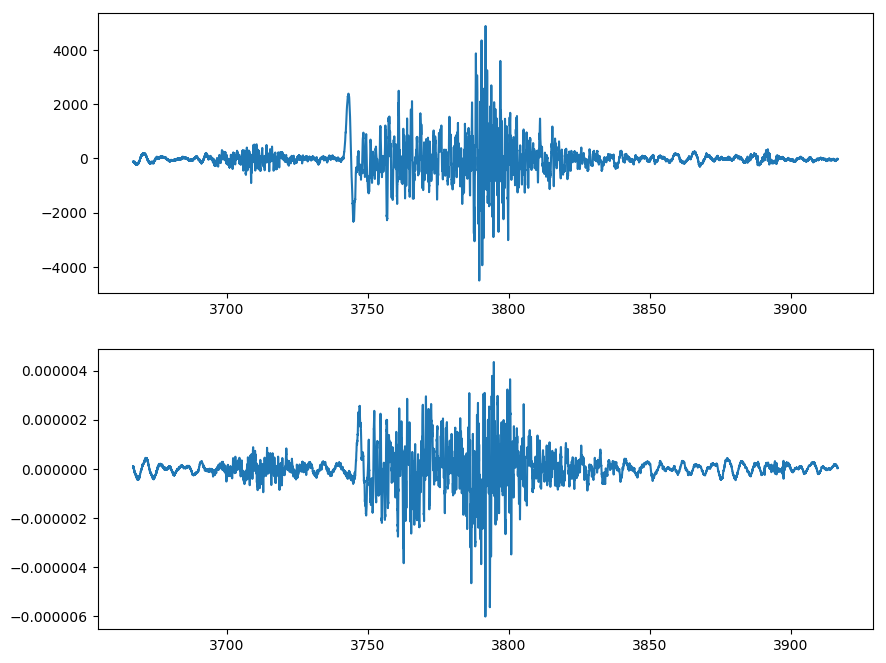

In [262]:
fig = figure(figsize=(10,8));
subplot(2,1,1)
plot(tiempo2,dat2);
subplot(2,1,2)
plot(tiempo3,dat3);


In [263]:
fre = collect(0:length(dat1))*dsB;

LoadError: [91mUndefVarError: dsB not defined[39m

In [264]:
Bff = fft(dat1,1)
Bff[1] = 0;

In [265]:
fig = figure(figsize=(10,8))
subplot(2,1,1)
plot(fre[1:nn],abs.(Bff[1:nn]));

LoadError: [91mUndefVarError: fre not defined[39m

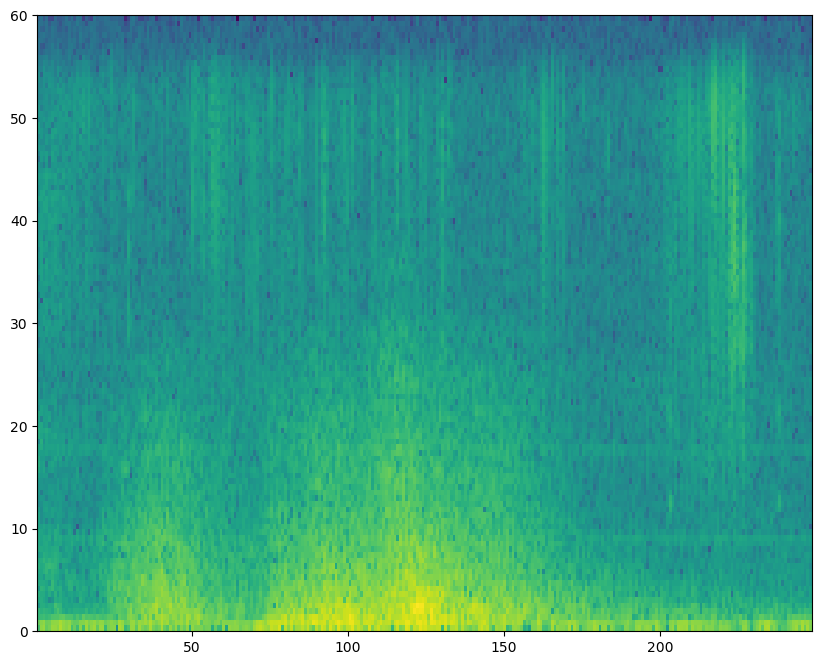

In [266]:
fig = figure(figsize=(10,8))
specgram(dat1,216,HHE.fs,pad_to=216,noverlap=108);

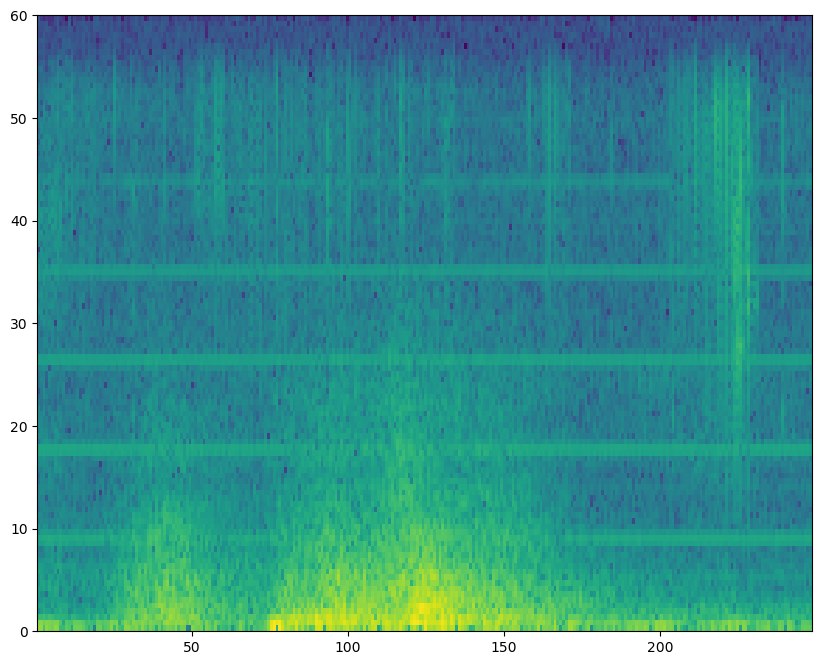

In [267]:
fig = figure(figsize=(10,8))
specgram(dat2,216,HHN.fs,pad_to=216,noverlap=108);


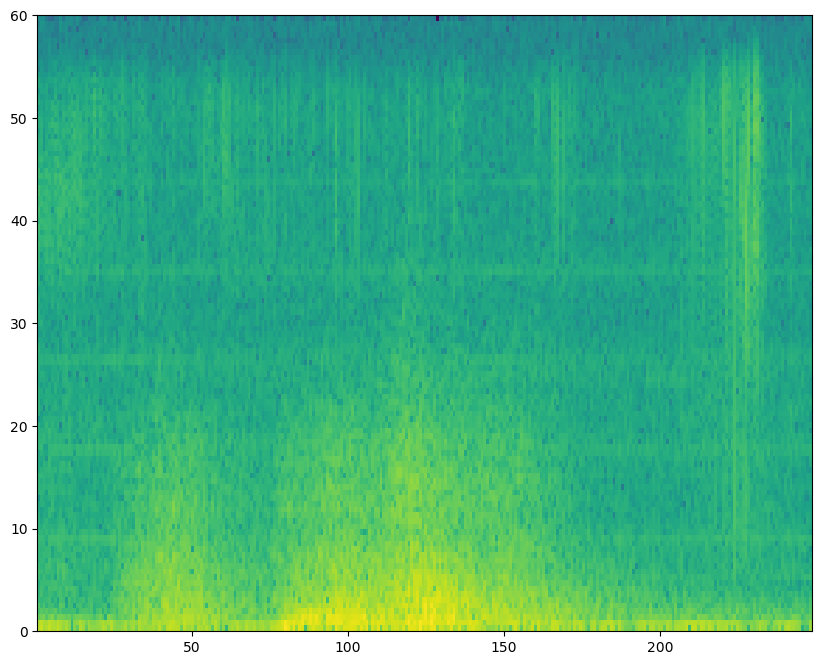

In [268]:
fig = figure(figsize=(10,8))
specgram(dat3,216,HHZ.fs,pad_to=216,noverlap=108);


PROCESO DE DIGITALIZACION (FRECUENCIA DE MUESTREO)